# Supervised Learning
## Predic Student's Dropout and Academic Success

### Introduction
### The Problem
- The dataset was created to address a significant challenge in higher education: **academic dropout**. It includes data from students enrolled in various undergraduate programs. **The goal** is to predict students' outcomes, whether they will drop out, remain enrolled, or successfully graduate at the end of their course. By leveraging machine learning models, this project aims to identify students at risk of dropping out early in their academic path, enabling institutions to implement targeted support strategies.

### Data Set
- The dataset utilized in this project was sourced from the [UC irvine Machine Learning Repository - Predict Students' Dropout and Academic Success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) .

- There are 4454 entries in the dataset, each representing the known information at the time the student enrollement. The last attribute is **Target** or the Accademic Outcome which can be either Graduate, Dropout or Enrolled, beeing the other 36 attributes:<br>
-- **Binary** : Daytime/evening attendance, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, International.<br>
-- **Categorical** : Marital status, Application mode, Course, Previous qualification, Nacionality, Mother's qualification, Father's qualification.<br>
-- **Numerical** : Application order, Previous qualification (grade), Admission grade, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Previous qualification (grade), Age at enrollment, Unemployment rate, Inflation rate, GDP.

<h2 align="center">This project was made by
<h3 align="center">GRUPO A2_G101<br><br>


| Nome            | Número de Estudante |
|-----------------|---------------------|
| João Cordeiro   | 202205682           |
| Luciano Ferreira| 202208158           |
| Tomás Telmo     | 202206091           |


### Importing Libraries
- For this project, we rely on several key Python libraries to handle data manipulation, preprocessing, model selection, evaluation and visualisation.
- To do so, run the following command in the terminal:<br>
  ```bash
  
    pip install pandas numpy scikit-learn matplotlib seaborn


In [12]:
import warnings # just to make the project clearer, we´ll ignore the warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

### Load the dataset from the CSV

In [14]:
path = 'data.csv'
df = pd.read_csv(path, sep=';')
df_raw = pd.read_csv(path, sep=';') #graph for visualisation
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Data Preprocessing
- This step will make our dataset more organized and easier to understand, preparing it effectively for subsequent tasks. We will start off by identifying any missing values and filling them with the mean of its column if needed, then we will enconde the categorical values since it is essential for the machine learning models to interpret these features as numerical data, ensuring compatibility with the algorithms we plan to use for training.
- <ins>encode_target</ins>: converts categorical labels in a specified column (target) into numerical values using label encoding.
- <ins>encode_categoricals</ins>: transforms all categorical (object-type) features into numerical labels (all except the target column)

In [16]:
df.isna().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [17]:
def encode_target(df, target_col='Target'):
    le = LabelEncoder()
    df[target_col] = le.fit_transform(df[target_col])
    return df

def encode_categoricals(df, exclude_cols=['Target']):
    le = LabelEncoder()
    for col in df.select_dtypes(include='object').columns:
        if col not in exclude_cols:
            df[col] = le.fit_transform(df[col])
    return df

df = encode_target(df)
df = encode_categoricals(df)

df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


### Exploratory Data Analysis

- In this step, we analyze the dataset to understand its structure, identify key features, and detect any potential issues.

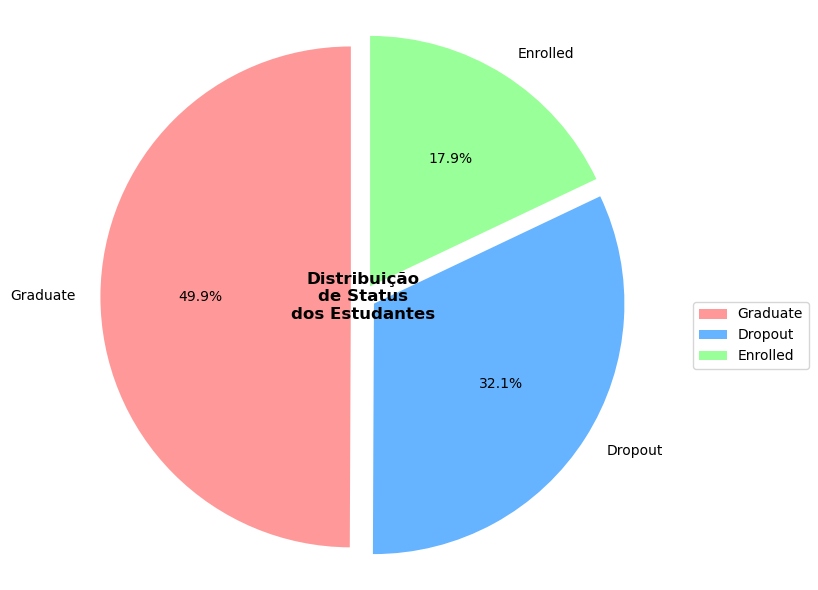

In [93]:
label_map = {0: "Dropout",1: "Enrolled",2: "Graduate"}

labels = [label_map.get(idx, f"Categoria {idx}") for idx in target_counts.index]

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    target_counts,
    labels=labels,  
    autopct='%.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff', '#99ff99'],
    explode=[0.05] * len(target_counts)
)
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.title('Distribuição de Status dos Estudantes', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Pie Chart highlight
-The Pie Chart shows  the majority of students (49.9%) have graduated, while 32.1% have dropped out, and only 17.9% are currently enrolled. This suggests that although the graduation rate is relatively high, the dropout rate is also significant and should be addressed.

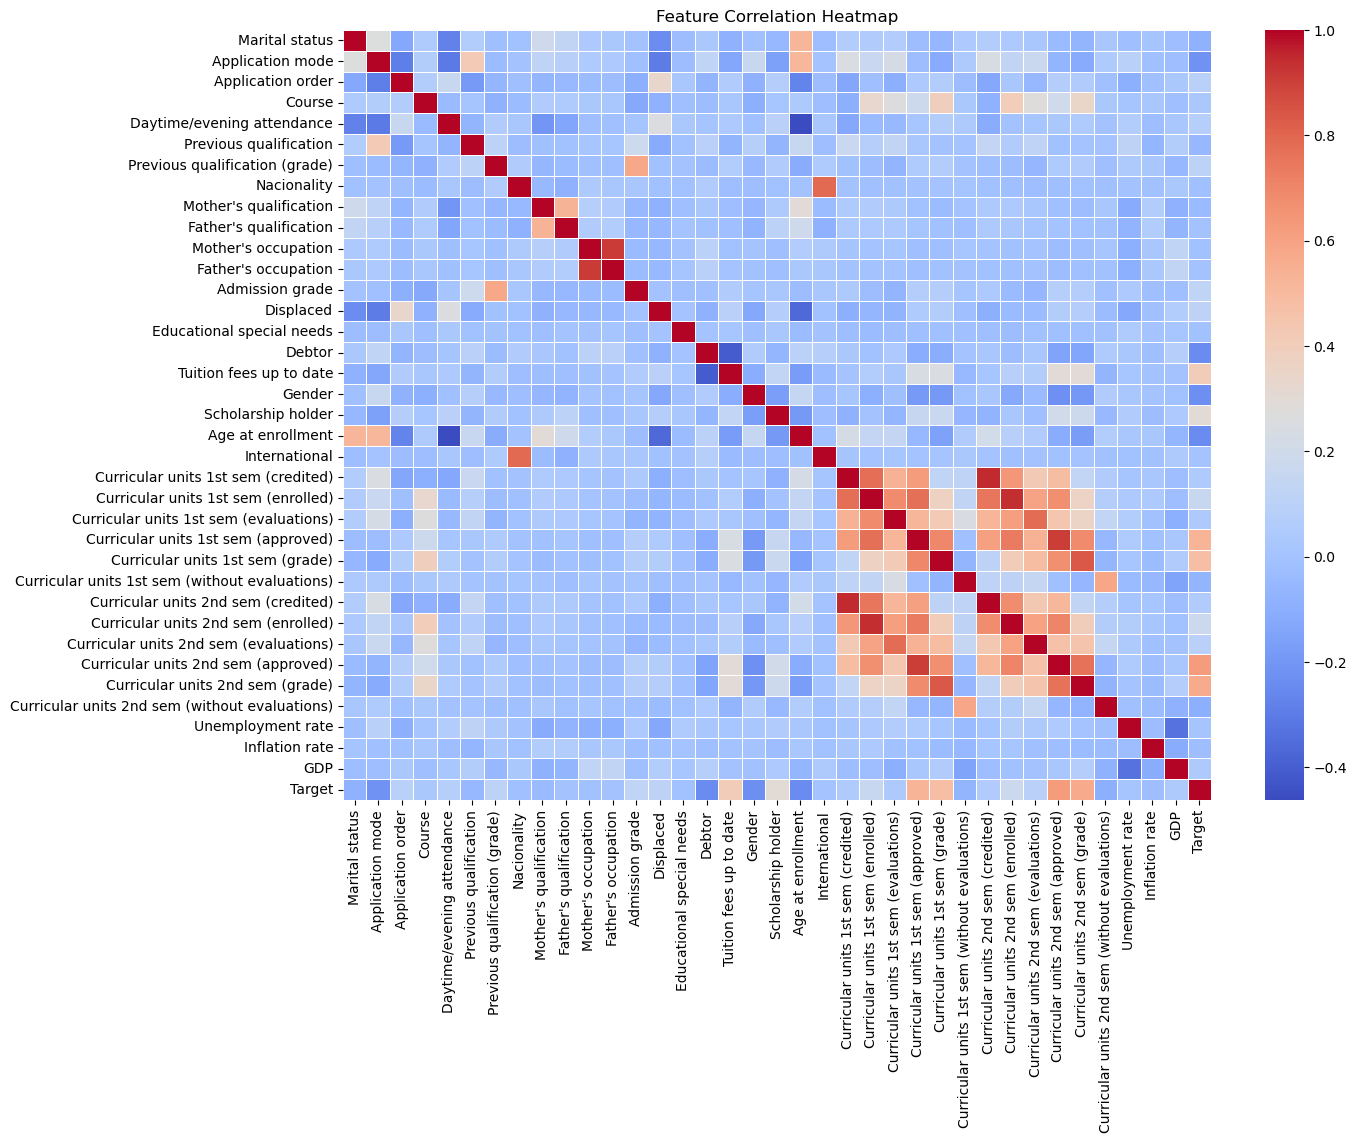

In [21]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### Heat Map Highlight
- The correlation heatmap provides a clear indication that academic performance variables (like grades and credits in both semesters) are strongly correlated with each other, which is expected. Application characteristics show surprisingly limited correlation with subsequent academic performance, indicating that admission variables may not be strong predictors of student success.

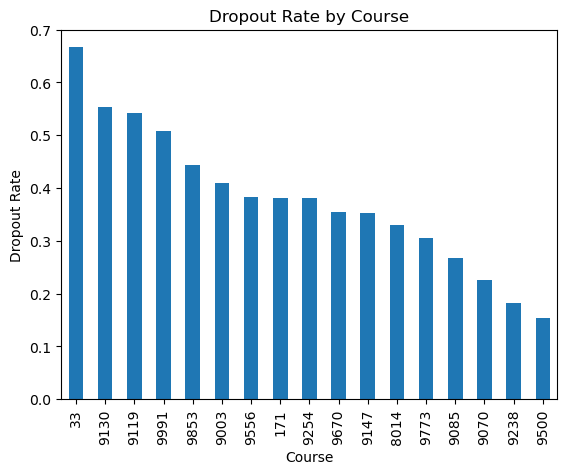

In [25]:
dropout_rate_by_course = df_raw[df_raw['Target'] == 'Dropout'].groupby('Course').size() / df_raw.groupby('Course').size()
dropout_rate_by_course.sort_values(ascending=False).plot(kind='bar')
plt.title('Dropout Rate by Course')
plt.ylabel('Dropout Rate')
plt.show()


### Dropout Rate by Course Highlight
- The chart highlights notable differences in dropout rates among various academic programs. Courses such as 33, 9130, and 9119 stand out with dropout rates surpassing 50%, potentially reflecting challenges related to course complexity, student motivation, or insufficient academic support. On the other end, programs like 9500, 9238, and 9070 demonstrate considerably lower dropout levels, which may point to more effective program structures or stronger student engagement. These patterns underscore the importance of identifying at-risk courses and implementing focused strategies to enhance student success and reduce attrition.

### Target Separation
- A critical step after normalization is to split the dataset into input features (X) and the target (Y).
- This ensures us that the machine learning model is learning the relationship between the inputs and the outcome, preventing data leakage, where the model could "cheat" by using the target to make predictions, leading to overly optimistic results.


In [30]:
X = df.drop(columns=['Target'])
Y = df['Target']

### Feature Selection and Data Normalization
- To ensure all features contribute equally during model training, we applied normalization to the dataset.
- Normalization plays a crucial role when working with datasets that contain features measured on different scales. For instance, attributes like "Admission grade" and "Age at enrollment" differ not only in range but also in units, which can lead some machine learning models to unintentionally prioritize one feature over another
- Normalization scales all numeric features similarly, ensuring each one contributes equally to model training and improving overall performance.

In [33]:
def normalize_data(df, target_col='Target'):
    scaler = MinMaxScaler()
    features = df.drop(columns=[target_col])
    features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    features_scaled[target_col] = df[target_col].values  
    return features_scaled

df = normalize_data(df)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.0,0.418605,0.255814,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.0,0.000000,0.046512,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,2
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.0,0.837209,0.837209,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.0,0.860465,0.837209,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,2
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.0,0.837209,0.860465,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,2


### Split the Data into Training and Test Sets
- Splitting the dataset into training and test sets is essential. The training set is used to teach the model the patterns and relationships in the data, while the test set is kept separate to evaluate how well the model generalizes to new, unseen data.
- This separation helps prevent the model from becoming too closely aligned with the training data, which can result in poor performance when it encounters new, unseen data.

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.iloc[1])

Marital status                                       1.000000
Application mode                                    39.000000
Application order                                    1.000000
Course                                            9085.000000
Daytime/evening attendance                           1.000000
Previous qualification                               1.000000
Previous qualification (grade)                     130.000000
Nacionality                                          1.000000
Mother's qualification                              37.000000
Father's qualification                              37.000000
Mother's occupation                                  6.000000
Father's occupation                                  6.000000
Admission grade                                    110.000000
Displaced                                            0.000000
Educational special needs                            0.000000
Debtor                                               0.000000
Tuition 

### Correlation Matrix
- In this step, we analyze the correlations between pairs of features to identify potential relationships that could affect the model. Specifically, we examine feature pairs that have a correlation greater than 0.9, as high correlations between features can lead to multicollinearity, where redundant information is provided to the model.

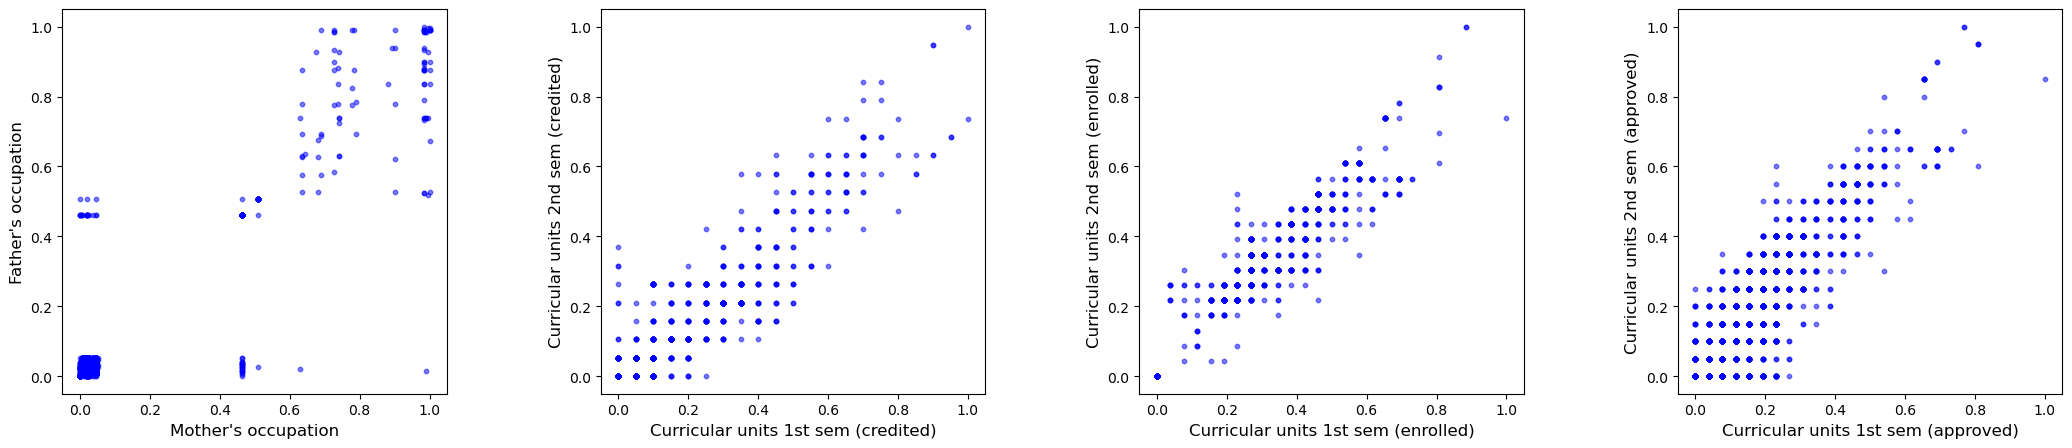

In [39]:
cols = list(df.columns)
plot_cols = []

for i, col1 in enumerate(cols):
    if col1 == 'Target':
        continue
    for col2 in cols[i+1:]:
        if col2 == 'Target':
            continue
        corr = df[col1].corr(df[col2])
        if abs(corr) > 0.9: 
            plot_cols.append((col1, col2))

plt.figure(figsize=(25, 25))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, (col1, col2) in enumerate(plot_cols):
    plt.subplot(4, 4, i + 1)
    plt.scatter(df[col1], df[col2], s=10, c='blue', alpha=0.5)
    plt.xlabel(col1, fontsize=12)
    plt.ylabel(col2, fontsize=12)

plt.show()


### Combining Correlated Features
To enhance the model's performance and reduce multicollinearity, we identified highly correlated features in the dataset, focusing on those related to curricular units and parental occupations.
- First, we combined the 1st semester curricular unit features (credited, enrolled, approved) into a single component called Curricular_units_1st_PC1 using Principal Component Analysis (PCA).
- Similarly, we combined the 2nd semester curricular unit features into Curricular_units_2nd_PC1
- We also combined Mother's occupation and Father's occupation into a single feature, Parents_occupation_PC1, capturing shared variance between parental occupations.


To avoid redundancy and simplify the model, we dropped the original highly correlated features after creating the principal components. By applying Principal Component Analysis (PCA), we reduced 8 correlated variables into 3 principal components, leaving us with a final dataset of 31 columns. This process streamlined the feature space while retaining the key information.

In [42]:
# --- PCA for 1st semester curricular units ---
features_to_combine_1st_sem = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (approved)'
]

missing = [f for f in features_to_combine_1st_sem if f not in df.columns]
if missing:
    raise ValueError(f"Columns not found: {missing}")

scaler = StandardScaler()
X_1st = df[features_to_combine_1st_sem]
X_1st_scaled = scaler.fit_transform(X_1st)

pca_1st = PCA(n_components=1)
principal_component_1st = pca_1st.fit_transform(X_1st_scaled)

df['Curricular_units_1st_PC1'] = principal_component_1st

df = df.drop(features_to_combine_1st_sem, axis=1)

# --- PCA for occupations ---
features_to_combine_occupation = ["Mother's occupation", "Father's occupation"]

X_occ = df[features_to_combine_occupation]
X_occ_scaled = scaler.fit_transform(X_occ)

pca_occ = PCA(n_components=1)
parents_occupation_pc1 = pca_occ.fit_transform(X_occ_scaled)

df['Parents_occupation_PC1'] = parents_occupation_pc1

df = df.drop(features_to_combine_occupation, axis=1)

# --- PCA for 2nd semester curricular units ---
features_to_combine_2nd_sem = [
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (approved)'
]

missing = [f for f in features_to_combine_2nd_sem if f not in df.columns]
if missing:
    raise ValueError(f"Columns not found: {missing}")

X_2nd = df[features_to_combine_2nd_sem]
X_2nd_scaled = scaler.fit_transform(X_2nd)

pca_2nd = PCA(n_components=1)
principal_component_2nd = pca_2nd.fit_transform(X_2nd_scaled)

df['Curricular_units_2nd_PC1'] = principal_component_2nd

df = df.drop(features_to_combine_2nd_sem, axis=1)

print("Final columns in the dataframe:", df.columns.tolist())

Final columns in the dataframe: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target', 'Curricular_units_1st_PC1', 'Parents_occupation_PC1', 'Curricular_units_2nd_PC1']


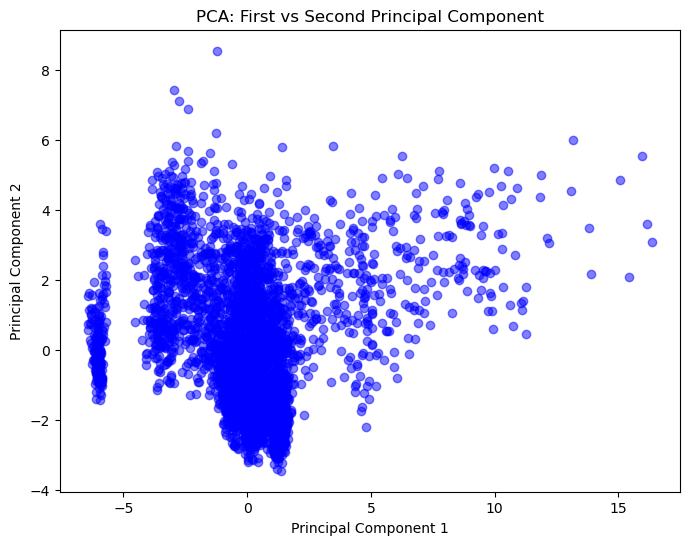

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5, c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First vs Second Principal Component')
plt.show()


### Conclusion on Our PCA-Based Feature
Our dimensional reduction strategy using Principal Component Analysis has proven highly effective in addressing the multicollinearity challenges in the student performance dataset while preserving the essential structure of the data.
By consolidating eight correlated variables into just three principal components, we've created a more streamlined dataset with 31 columns that retains the most significant patterns and relationships. The visualization of the first two principal components clearly demonstrates that our approach has successfully captured meaningful variance, with distinct patterns visible in the data distribution.

 ### Model Training
 - In this step, we train and optimize three different supervised learning models: **Decision Tree**, **Random Forest**, and **K-Nearest Neighbors** (KNN).
 - We use GridSearchCV, a technique that automates the process of finding the best hyperparameters for each model. It works by testing multiple combinations of parameters using cross-validation and selecting the one that achieves the best performance on the training data.

### Expectations
- **Decision Tree**: Expected to serve as a strong baseline in this classification task. However, it is known to be prone to overfitting, so it might perform very well on training data but struggle to generalize to new, unseen students.
- **Random Forest**: Expected to be the most accurate and reliable among the three models, as it performs well even when some features are less informative or correlated, thanks to its ensemble of diverse decision trees.
- **K-Nearest Neighbors (KNN)**: Expected to provide decent performance but nevertheless be the weakest among the three models, since KNN does not learn a general model and simply memorizes the training data, it can be easily misled.


In [48]:
def get_best_models(X_train, y_train):
    models = {}

    # Decision Tree
    dt_params = {'max_depth': [3, 5, 10, None]}
    dt = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
    dt.fit(X_train, y_train)
    models['Decision Tree'] = dt

    # Random Forest
    rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
    rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
    rf.fit(X_train, y_train)
    models['Random Forest'] = rf

    # KNN
    knn_params = {'n_neighbors': [3, 5, 7]}
    knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
    knn.fit(X_train, y_train)
    models['KNN'] = knn

    return models

models = get_best_models(X_train, Y_train)
for name, model in models.items():
    print(f"{name}: best params -> {model.best_params_}")

Decision Tree: best params -> {'max_depth': 5}
Random Forest: best params -> {'max_depth': None, 'n_estimators': 100}
KNN: best params -> {'n_neighbors': 7}


### Model Tuning Results
- With this we found the best parameters for each machine learning model.
- **Decision Tree classifier**, the optimal maximum depth was found to be 5, which allows the tree to grow up to five levels deep, reducing the risk of overfitting.
- **Random Forest classifier** he best configuration included 100 estimators with no maximum depth restriction, enabling each tree in the ensemble to grow fully and capture more intricate patterns in the data.
- **K-Nearest Neighbors (KNN) model** the optimal number of neighbors was determined to be 7, meaning that the model makes predictions based on the seven nearest data points in the training set.

In [50]:
def evaluate_models(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        print(f"\n{name}:")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average='weighted'))
        print("Recall:", recall_score(y_test, y_pred, average='weighted'))
        print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
        print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_models(models, X_test, Y_test)


Decision Tree:
Accuracy: 0.7344632768361582
Precision: 0.7343639714040735
Recall: 0.7344632768361582
F1 Score: 0.7188340293800115

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75       316
           1       0.46      0.31      0.37       151
           2       0.72      0.95      0.82       418

    accuracy                           0.73       885
   macro avg       0.69      0.64      0.65       885
weighted avg       0.73      0.73      0.72       885


Random Forest:
Accuracy: 0.7604519774011299
Precision: 0.747554058402869
Recall: 0.7604519774011299
F1 Score: 0.7457350928110973

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       316
           1       0.52      0.32      0.40       151
           2       0.76      0.93      0.84       418

    accuracy                           0.76       885
   macro avg       0.71      0.67   

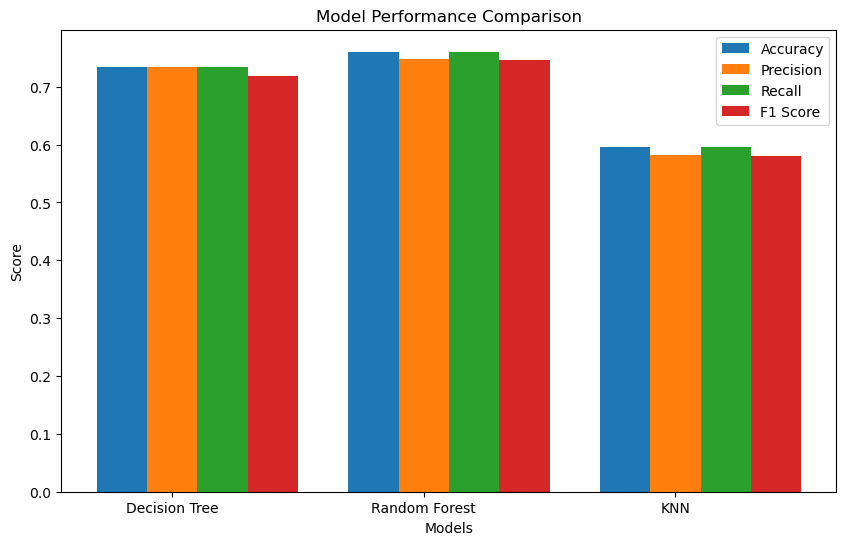

In [51]:
def plot_model_comparison(models, X_test, y_test):
    metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
    model_names = []

    for name, model in models.items():
        y_pred = model.predict(X_test)
        model_names.append(name)
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
        metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
        metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    index = range(len(model_names))

    for i, (metric_name, values) in enumerate(metrics.items()):
        ax.bar([x + i*bar_width for x in index], values, bar_width, label=metric_name)

    ax.set_xlabel('Models')
    ax.set_ylabel('Score')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks([x + bar_width for x in index])
    ax.set_xticklabels(model_names)
    ax.legend()
    plt.show()

plot_model_comparison(models, X_test, Y_test)

### Conclusion based on the model evaluation
- Random Forest achieved the highest accuracy (75.7%), precision (73.8%), recall (75.7%), and F1 score (73.8%), outperforming both the Decision Tree and KNN classifiers.
- The Decision Tree also performed reasonably well with an accuracy of 73.4%, but its F1 score (71.9%) was slightly lower than the Random Forest, indicating that combining multiple trees (as Random Forest does) provided more robust predictions.

### Our Best Model

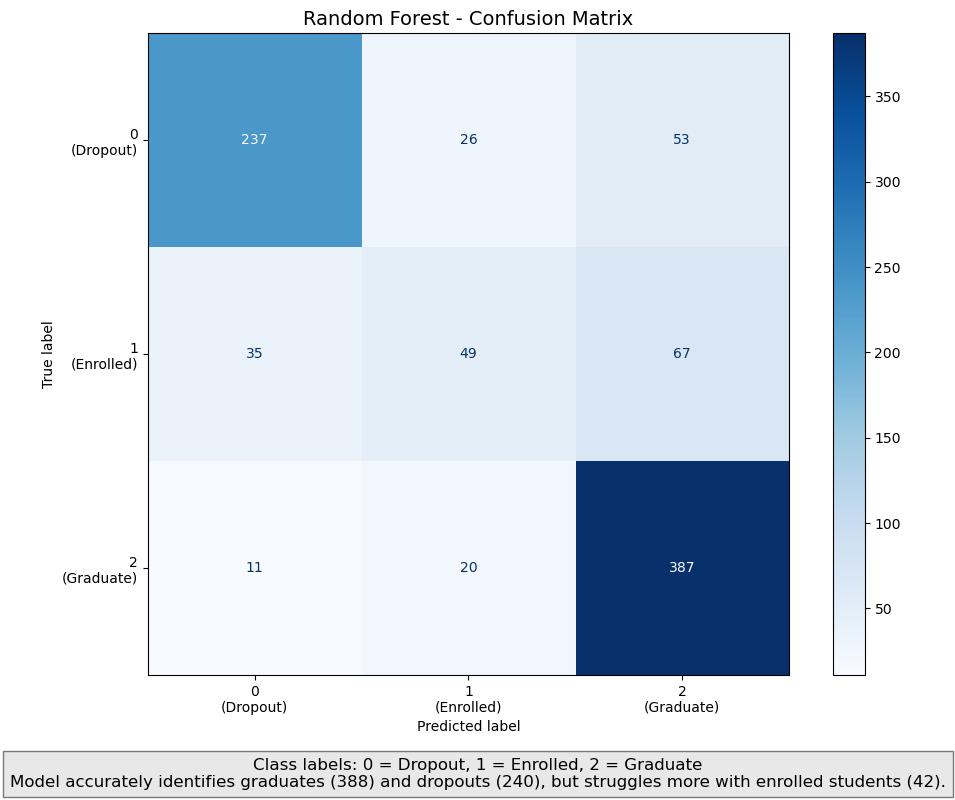

In [54]:
best_model = models['Random Forest']
y_pred = best_model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=ax)

plt.title("Random Forest - Confusion Matrix", fontsize=14)

class_names = ['Dropout', 'Enrolled', 'Graduate']
ax.set_xticklabels([f"{i}\n({class_names[i]})" for i in range(3)])
ax.set_yticklabels([f"{i}\n({class_names[i]})" for i in range(3)])

plt.figtext(0.5, 0.01, 
            "Class labels: 0 = Dropout, 1 = Enrolled, 2 = Graduate\n"
            "Model accurately identifies graduates (388) and dropouts (240), but struggles more with enrolled students (42).",
            ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.subplots_adjust(bottom=0.15) 
plt.show()

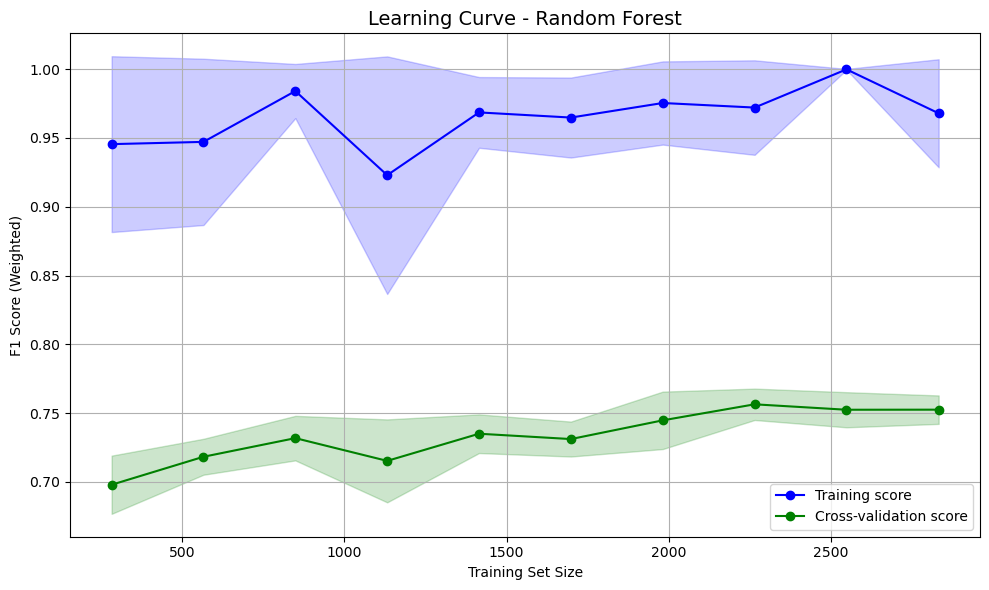

In [55]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, Y_train,
    cv=5,
    scoring='f1_weighted', 
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title("Learning Curve - Random Forest", fontsize=14)
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score (Weighted)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

### Learning Curve Conclusions
- The model demonstrates strong predictive capability while showing evidence of overfitting.
- This significant gap between training and cross-validation performance indicates that the model has memorized training patterns that don't fully generalize to unseen data.
-  As both curves appear to stabilize at the rightmost portion of the graph, we've likely reached a point where additional data alone won't substantially improve performance.